<a href="https://colab.research.google.com/github/nellyfadil/Neuro-265/blob/main/Neuro265Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Import Data Set
url = 'https://raw.githubusercontent.com/nellyfadil/Neuro-265/main/Coding%20Final%20Data.csv'
alz_data = pd.read_csv(url)
alz_data

,Donor ID,Sex,Atherosclerosis,total_AT8_positive_area_Layer1,total_AT8_positive_area_Layer2,total_pTDP43_positive_area_Layer1,total_pTDP43_positive_area_Layer5_6
0,H19.33.004,Female,Mild,1975.080078,847.397400,0.000000,0.000000
1,H20.33.001,Male,Mild,14229.885740,7990.394043,400.802887,954.328491
2,H20.33.002,Female,Moderate,1784.113770,1064.027222,0.000000,0.000000
3,H20.33.004,Male,Mild,218724.140600,86230.742190,0.000000,0.000000
4,H20.33.005,Female,Mild,12398.219730,11807.708010,0.000000,0.000000
...,...,...,...,...,...,...,...
79,H21.33.043,Female,Moderate,3263.033691,4088.541504,0.000000,0.000000
80,H21.33.044,Female,Mild,110072.343800,171691.578100,0.000000,0.000000
81,H21.33.045,Female,Moderate,793676.500000,860485.562500,2977.464600,5764.969238
82,H21.33.046,Male,Mild,25807.376950,35646.546880,0.000000,0.000000


In [3]:
#Create Variables
Sex= alz_data.iloc[:,1]
Atherosclerosis = alz_data.iloc[:,2]
total_AT8_positive_area_Layer1 = alz_data.iloc[:,3]
total_AT8_positive_area_Layer2 = alz_data.iloc[:,4]
total_pTDP43_Layer1 = alz_data.iloc[:,-2]
total_pTDP43_Layer5_6 = alz_data.iloc[:,-1]

Text(0.5, 0.98, 'Distribution of Monoclonal Antibodies in Layers 1 & 2')

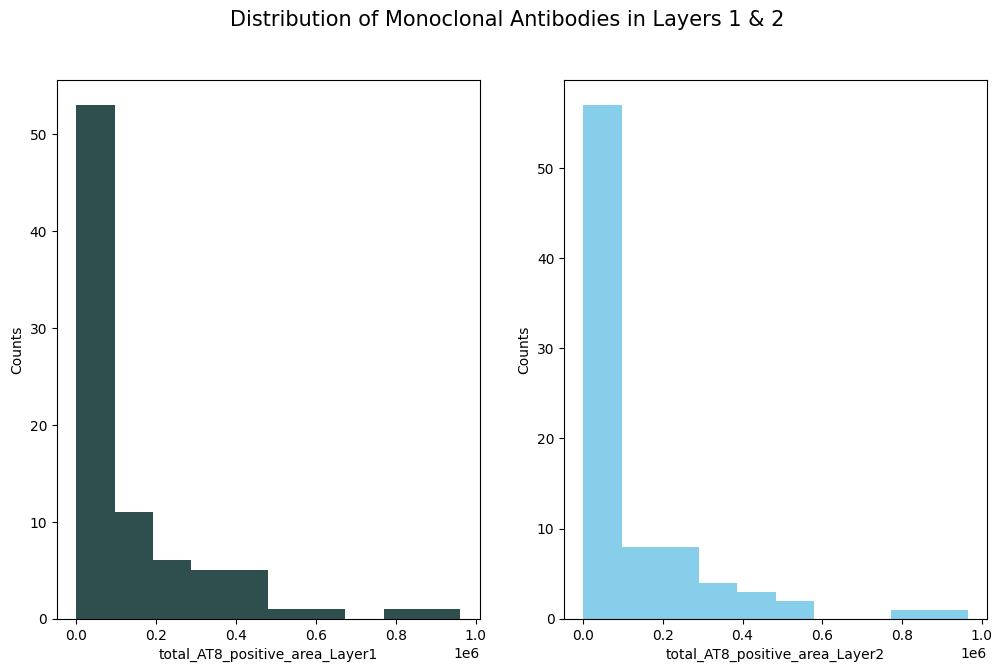

In [12]:
#Create Histograms for Distribution of AT8 layers 1 & 2
fig, ax = plt.subplots(1,2,figsize=(12,7))

ax[0].hist(total_AT8_positive_area_Layer1, color = 'darkslategrey')
ax[0].set_xlabel('total_AT8_positive_area_Layer1')
ax[0].set_ylabel('Counts')
ax[1].hist(total_AT8_positive_area_Layer2, color = 'skyblue')
ax[1].set_xlabel('total_AT8_positive_area_Layer2')
ax[1].set_ylabel('Counts')

fig.suptitle('Distribution of Monoclonal Antibodies in Layers 1 & 2', fontsize=15)


Text(0.5, 0.98, 'Distribution of Transactive Response DNA binding protein 43')

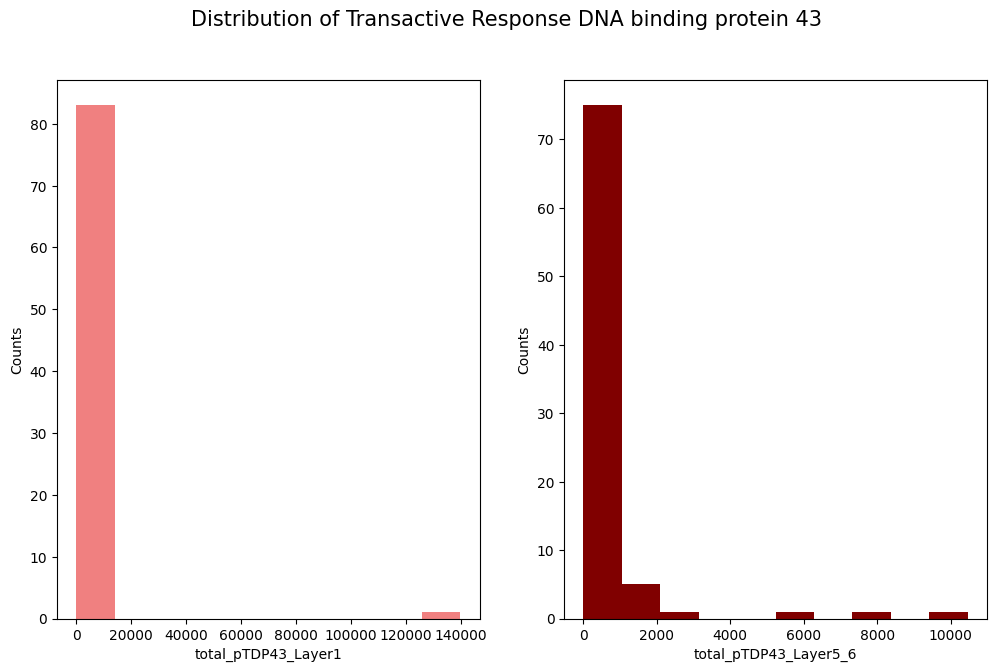

In [14]:
#Create Histograms for Distribution of TDP43 layers 1 & 5/6
fig, ax = plt.subplots(1,2,figsize=(12,7))

ax[0].hist(total_pTDP43_Layer1, color = 'lightCoral')
ax[0].set_xlabel('total_pTDP43_Layer1')
ax[0].set_ylabel('Counts')
ax[1].hist(total_pTDP43_Layer5_6, color = 'Maroon')
ax[1].set_xlabel('total_pTDP43_Layer5_6')
ax[1].set_ylabel('Counts')

fig.suptitle('Distribution of Transactive Response DNA binding protein 43', fontsize=15)

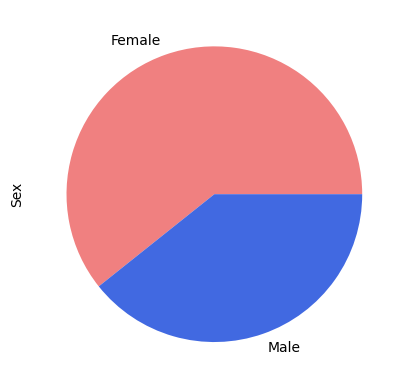

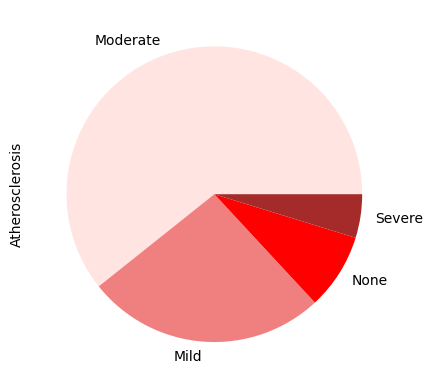

In [16]:
#Create Pie charts for grouping variables 
#Sex
colors = ['lightcoral', 'Royalblue']
alz_data['Sex'].value_counts().plot(kind = 'pie', colors = colors)
plt.ylabel('Sex')
plt.show()
#Atherosclerosis
colors = ['mistyrose', 'lightcoral','red', 'brown']
alz_data['Atherosclerosis'].value_counts().plot(kind='pie', colors=colors)
plt.ylabel('Atherosclerosis')
plt.show()

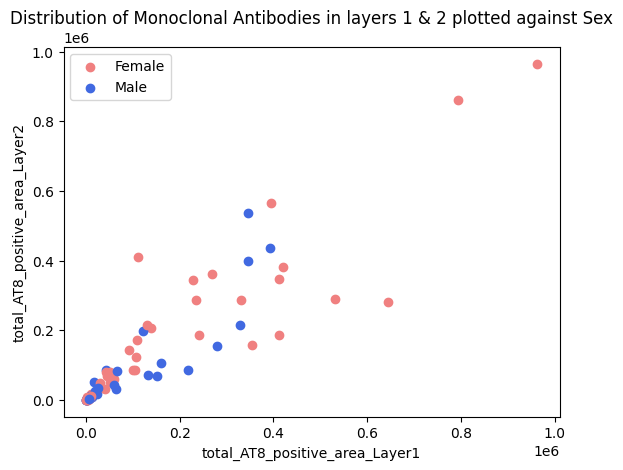

In [17]:
#create scatterplt bewteen two dependant variables 
alz_data_length=len(alz_data)

for i in range(alz_data_length):
  if alz_data.iloc[i,1] == 'Female':
    plt.scatter(alz_data.iloc[i,3],alz_data.iloc[i,4],color = 'lightcoral')
  else:
    plt.scatter(alz_data.iloc[i,3],alz_data.iloc[i,4],color = 'royalblue')
    plt.xlabel('total_AT8_positive_area_Layer1')
    plt.ylabel('total_AT8_positive_area_Layer2')
    plt.title('Distribution of Monoclonal Antibodies in layers 1 & 2 plotted against Sex')

plt.legend(['Female','Male'])

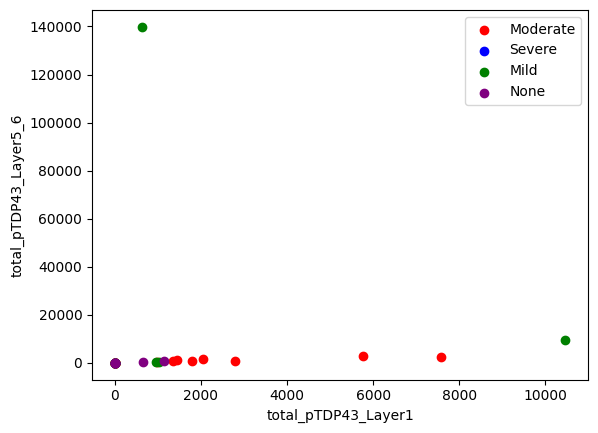

In [18]:
#Create scatter plot between two dependant variables 
alz_data_length=len(alz_data)
Moderate_x = []
Moderate_y = []
Severe_x = []
Severe_y = []
Mild_x = []
Mild_y = []
None_x = []
None_y = []

for i in range(alz_data_length):
  if alz_data.iloc[i,2] == 'Moderate':
    Moderate_x.append(alz_data.iloc[i,-1])
    Moderate_y.append(alz_data.iloc[i,-2])
  elif alz_data.iloc[i,2] == 'Severe':
    Severe_x.append(alz_data.iloc[i, -1])
    Severe_y.append(alz_data.iloc[i, -2])
  elif alz_data.iloc[i,2] == 'Mild':
    Mild_x.append(alz_data.iloc[i, -1])
    Mild_y.append(alz_data.iloc[i, -2])
  else:
    None_x.append(alz_data.iloc[i, -1])
    None_y.append(alz_data.iloc[i, -2])
plt.scatter(Moderate_x, Moderate_y, label='Moderate', color='Red')
plt.scatter(Severe_x, Severe_y, label='Severe', color = 'Blue')
plt.scatter(Mild_x, Mild_y, label='Mild', color='Green')
plt.scatter(None_x, None_y, label='None', color = 'Purple')
plt.xlabel('total_pTDP43_Layer1')
plt.ylabel('total_pTDP43_Layer5_6')
plt.title('')
plt.legend(loc='upper right')

In [25]:
#Make variables into numpy arrays 
female_at8_layer1 = np.array(alz_data.loc[alz_data['Sex'] == 'Female',['total_AT8_positive_area_Layer1']])
female_at8_layer2 = np.array(alz_data.loc[alz_data['Sex'] == 'Female',['total_AT8_positive_area_Layer2']])
male_at8_layer1 = np.array(alz_data.loc[alz_data['Sex'] == 'Male',['total_AT8_positive_area_Layer1']])
male_at8_layer2 = np.array(alz_data.loc[alz_data['Sex'] == 'Male',['total_AT8_positive_area_Layer2']])
SA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'Severe', ['total_pTDP43_positive_area_Layer1']])
SA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'Severe', ['total_pTDP43_positive_area_Layer5_6']])
MA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'Moderate', ['total_pTDP43_positive_area_Layer1']])
MA_pTDP43_layer5_6 = np.array (alz_data.loc[alz_data['Atherosclerosis'] == 'Moderate',['total_pTDP43_positive_area_Layer5_6']])
MildA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'Mild',['total_pTDP43_positive_area_Layer1']])
MildA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'Mild',['total_pTDP43_positive_area_Layer5_6']])
NA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'None',['total_pTDP43_positive_area_Layer1']])
NA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis'] == 'None',['total_pTDP43_positive_area_Layer5_6']])

[Text(0.5, 1.0, 'Severity of Atherosclerosis')]

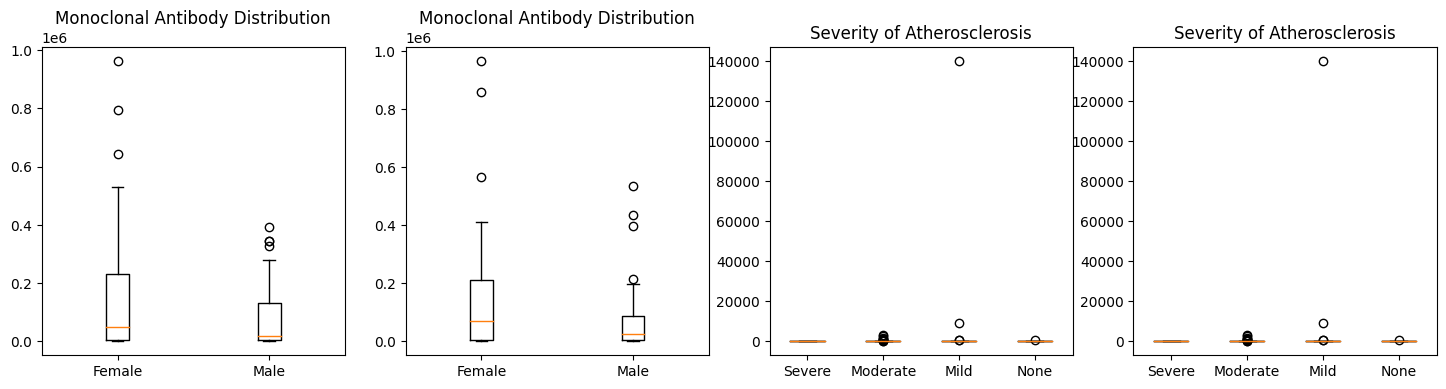

In [26]:
#Make box plots for depedent variables
fig, ax = plt.subplots(1,4, figsize = (18,4))

at8_layer1 = [female_at8_layer1.flatten(), male_at8_layer1.flatten()]
ax[0].boxplot(at8_layer1)
ax[0].set_xticklabels(['Female', 'Male'])
ax[0].set(title = 'Monoclonal Antibody Distribution')

at8_layer2 = [female_at8_layer2.flatten(), male_at8_layer2.flatten()]
ax[1].boxplot(at8_layer2)
ax[1].set_xticklabels(['Female', 'Male'])
ax[1].set(title = 'Monoclonal Antibody Distribution')

pTDP43_layer1 = [SA_pTDP43_layer1.flatten(), MA_pTDP43_layer1.flatten(), MildA_pTDP43_layer1.flatten(), NA_pTDP43_layer1.flatten()]
ax[2].boxplot(pTDP43_layer1)
ax[2].set_xticklabels(['Severe', 'Moderate', 'Mild', 'None'])
ax[2].set(title = 'Severity of Atherosclerosis')

pTDP43_layer5_6 = [SA_pTDP43_layer1.flatten(), MA_pTDP43_layer1.flatten(), MildA_pTDP43_layer1.flatten(), NA_pTDP43_layer1.flatten()]
ax[3].boxplot(pTDP43_layer5_6)
ax[3].set_xticklabels(['Severe', 'Moderate', 'Mild', 'None'])
ax[3].set(title = 'Severity of Atherosclerosis')

In [27]:
print(stats.skewtest(total_AT8_positive_area_Layer1))
print(stats.skewtest(total_AT8_positive_area_Layer2))
print(stats.skewtest(total_pTDP43_Layer1))
print(stats.skewtest(total_pTDP43_Layer5_6))

SkewtestResult(statistic=5.934896381068895, pvalue=2.940311385464904e-09)
SkewtestResult(statistic=6.233703538700057, pvalue=4.5553480581355584e-10)
SkewtestResult(statistic=11.01353437849721, pvalue=3.288448274572705e-28)
SkewtestResult(statistic=8.65973365183073, pvalue=4.728678401341253e-18)


In [28]:
print(stats.mannwhitneyu(female_at8_layer1, male_at8_layer1))
print(stats.mannwhitneyu(female_at8_layer2, male_at8_layer2))
print(stats.mannwhitneyu(SA_pTDP43_layer1, MA_pTDP43_layer1))
print(stats.mannwhitneyu(MildA_pTDP43_layer1, NA_pTDP43_layer1))
print(stats.mannwhitneyu(SA_pTDP43_layer5_6, MA_pTDP43_layer5_6))
print(stats.mannwhitneyu(MildA_pTDP43_layer5_6, NA_pTDP43_layer5_6))

MannwhitneyuResult(statistic=array([953.]), pvalue=array([0.30933041]))
MannwhitneyuResult(statistic=array([996.]), pvalue=array([0.15840481]))
MannwhitneyuResult(statistic=array([84.]), pvalue=array([0.37865051]))
MannwhitneyuResult(statistic=array([71.]), pvalue=array([0.69223196]))
MannwhitneyuResult(statistic=array([86.]), pvalue=array([0.41266942]))
MannwhitneyuResult(statistic=array([69.]), pvalue=array([0.58935884]))
